***GRIP: THE SPARK FOUNDATION***

**AUTHOR : ANKUSH BRELLA**

Task 3 ,Data Science & Business Analytics Internship ,The Sparks Foundation

Exploratory Data Analysis - IPL Sports (Level - Advance)

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

delv_df=pd.read_csv('deliveries.csv' )
matches_df=pd.read_csv('matches.csv')

In [3]:
#merging the dataset by the match_id

df=pd.merge(delv_df,matches_df,how="left",left_on='match_id',right_on='id',left_index=False,right_index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
df.shape

(179078, 39)

In [6]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [8]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [9]:
#cleaning the data
df=df.drop(['team2', 'id', 'venue', 'umpire1', 'umpire2', 'umpire3', 'penalty_runs'],axis=1)

In [10]:
#checking for null values
df.isna().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
season              False
city                 True
date                False
team1               False
toss_winner         False
toss_decision       False
result              False
dl_applied          False
winner               True
win_by_runs         False
win_by_wickets      False
player_of_match      True
dtype: bool

In [11]:
#number of seasons
season = df['season'].unique()
season.sort()
print(season)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [12]:
#Winners of IPL
winners = []
for i in season:
    winners.append(matches_df[matches_df.season == i].iloc[-1:,-8].values[0])
    
season_winners = pd.DataFrame({'Season': season, 'Winners': winners})
season_winners

,Season,Winners
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


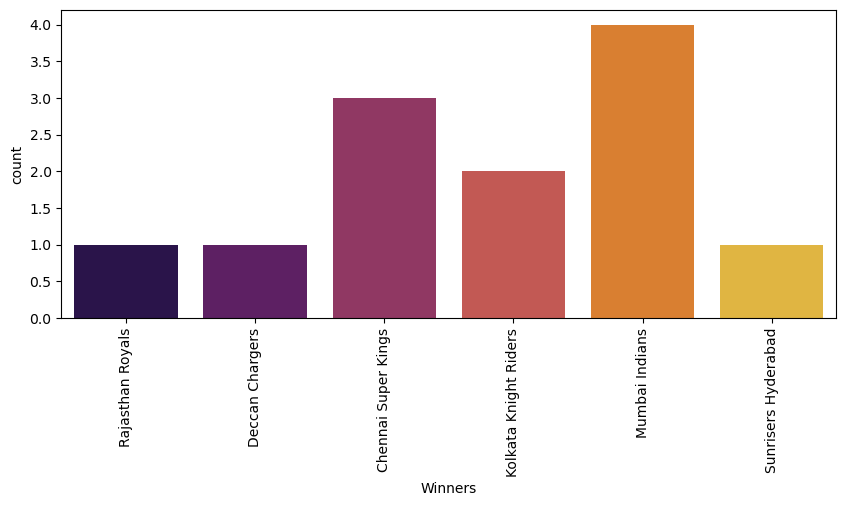

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(season_winners.Winners ,ax=ax, data=matches_df, palette = 'inferno')
plt.xticks(rotation = 90)
plt.show()

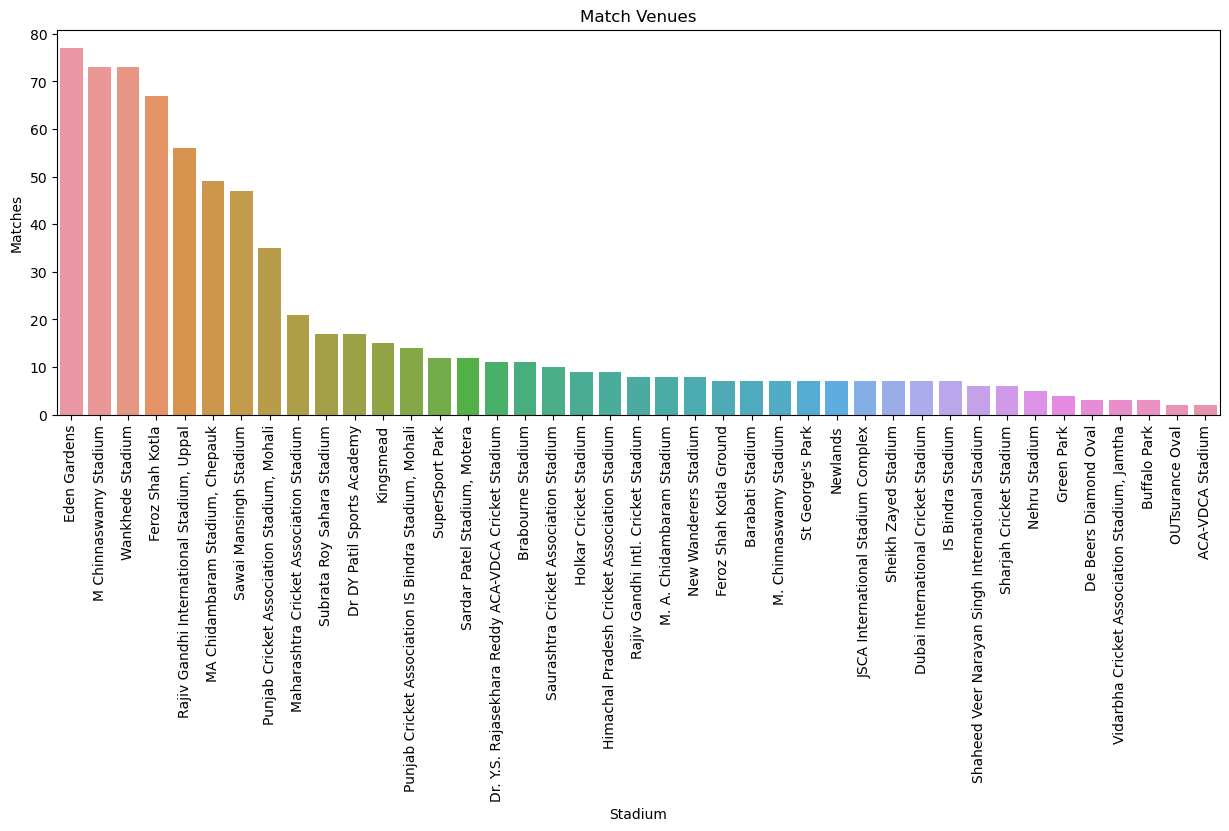

In [14]:
#match venues
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = matches_df,order = matches_df['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90);

Observation: Most number of matches have been held at Eden garden followed by M Chinnaswamy Stadium

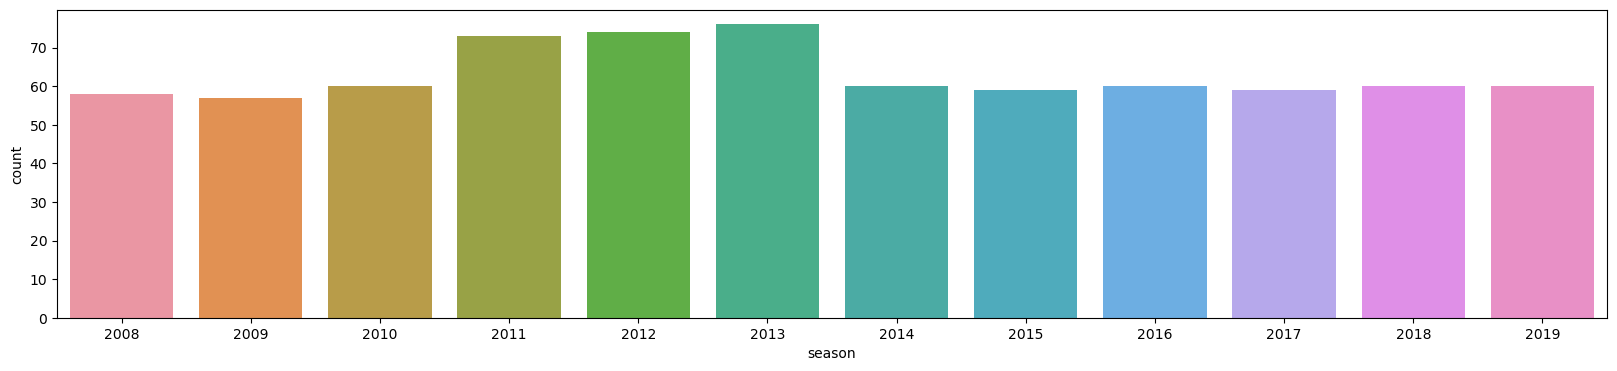

In [15]:
#Number of matches played in every season
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(x = 'season' ,ax=ax, data=matches_df)
plt.show()

Observation: Most number of matches were played in 2013 season as there were 10 teams to compete.

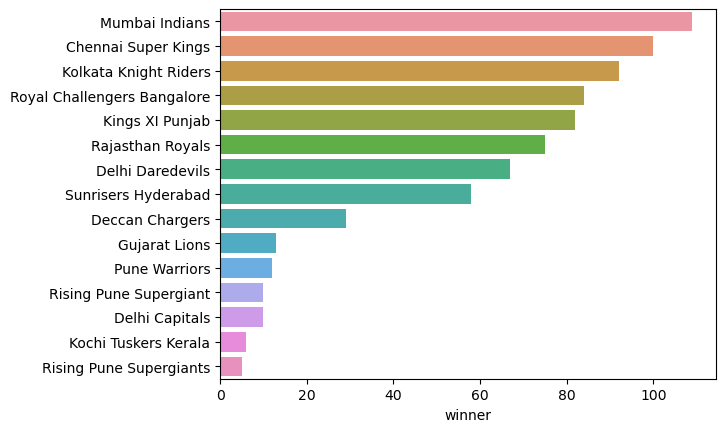

In [16]:
#Number of matches won by teams
succ_team = matches_df.winner.value_counts()
sns.barplot(y = succ_team.index, x = succ_team);

Observation: Mumbai Indian have won the most number of matches followed by Chennai Super Kings.

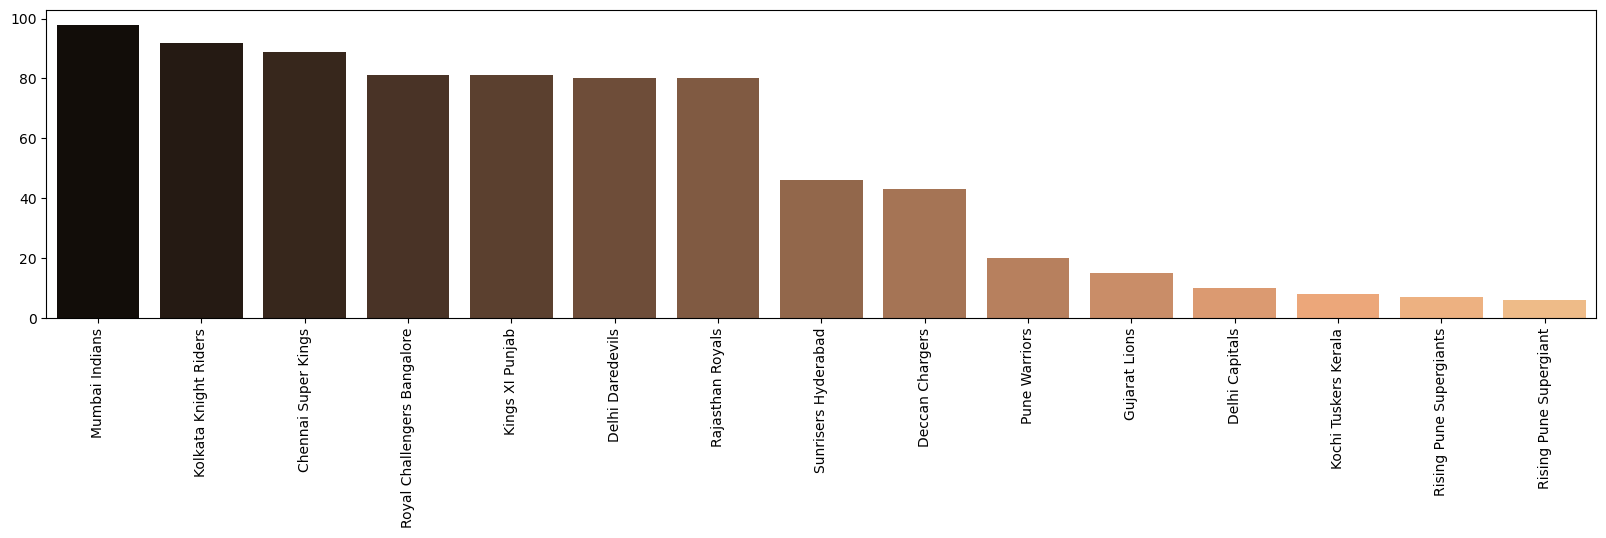

In [17]:
#number of toss wons
fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(list(matches_df['toss_winner'].value_counts().keys()),list(matches_df['toss_winner'].value_counts()), palette = 'copper')
plt.xticks(rotation = 90);

Observation: Mumbai Indians is the most lucky team for winning most number of tosses.

In [18]:
#Relationship between winning toss and winning match
probability_of_win =matches_df['toss_winner']== matches_df['winner']
probability_of_win.groupby(probability_of_win).size()

False    363
True     393
dtype: int64

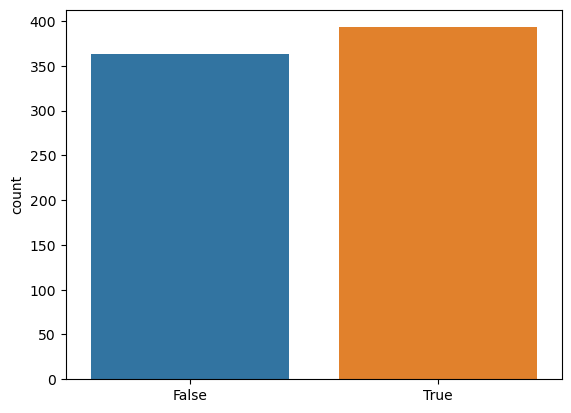

In [19]:
sns.countplot(probability_of_win);

Observation: There is a negligible difference between winning the match on basis of result of toss.

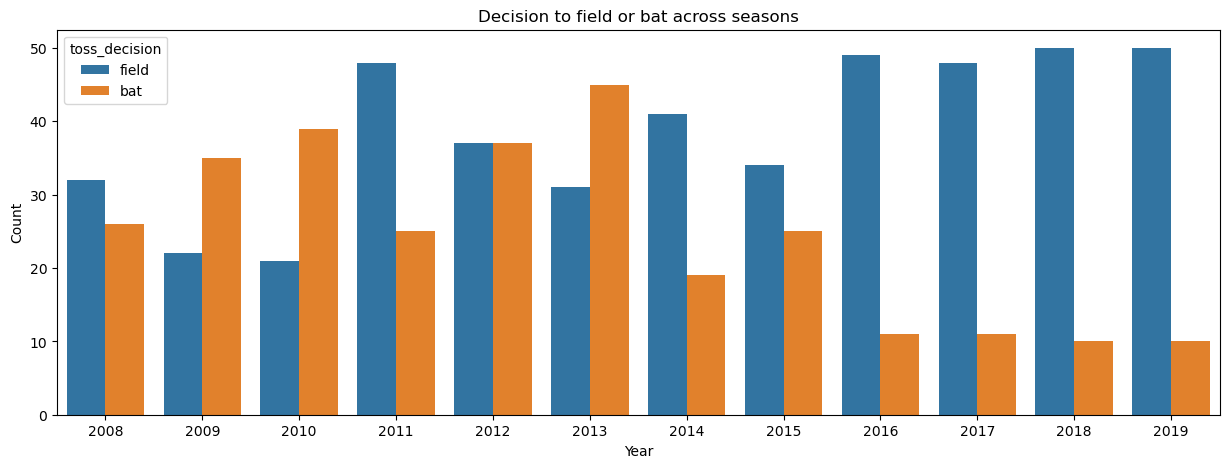

In [20]:
#Decision after winning toss
plt.figure(figsize=(15,5))
sns.countplot(matches_df['season'].sort_values(),hue=matches_df['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Observation: Mostly teams chose to chase after winning the toss.

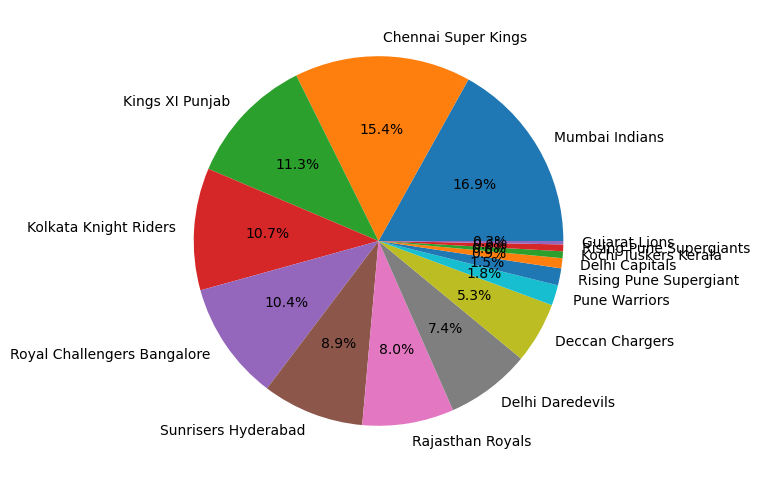

In [21]:
#winning based on batting first
batting_first = matches_df[matches_df['win_by_runs']!=0]
plt.figure(figsize=(6,6))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

Observation: Mumbai Indian defend their target better than other teams.

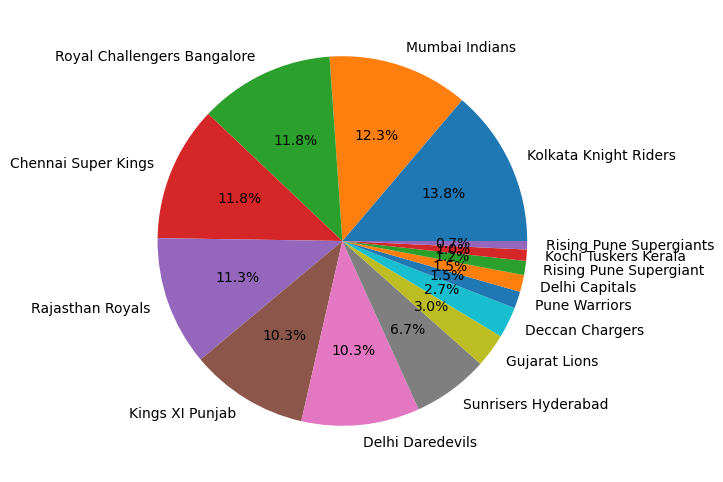

In [22]:
#winning based on batting second
batting_second = matches_df[matches_df['win_by_wickets']!=0]
plt.figure(figsize = (6,6))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()),autopct = '%0.1f%%')
plt.show()

Observation: Kolkata Knight Riders chase the target better than other teams.

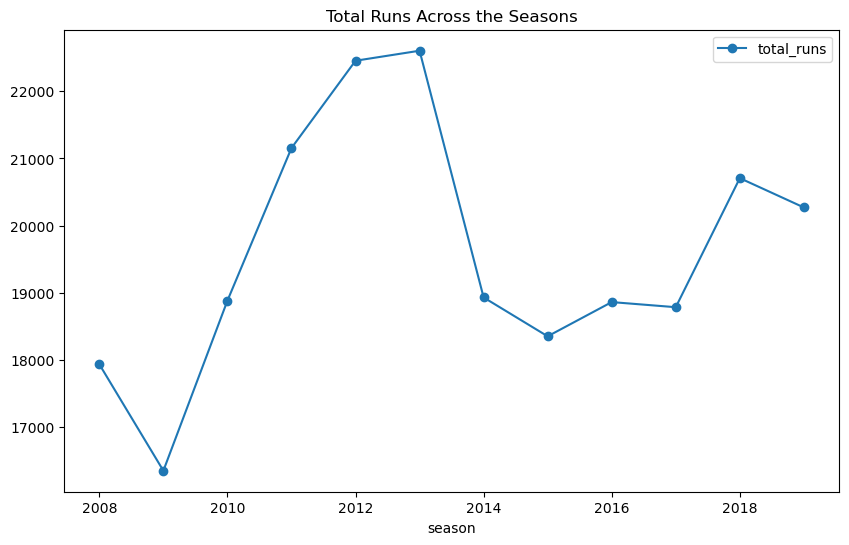

In [23]:
#total runs across seasons
season=df.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

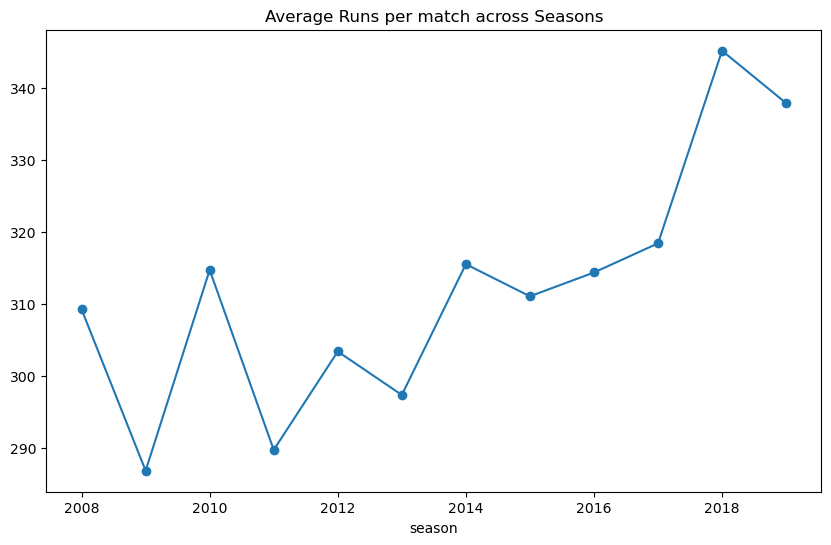

In [24]:
#Average Runs per match across Seasons
avgruns_each_season=matches_df.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.show()

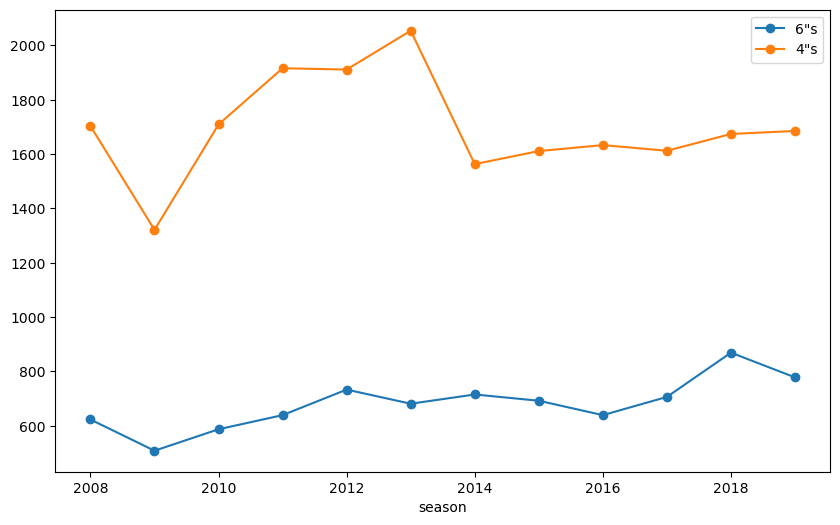

In [25]:
#number of boundaries across seasons
Season_boundaries=df.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=df.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

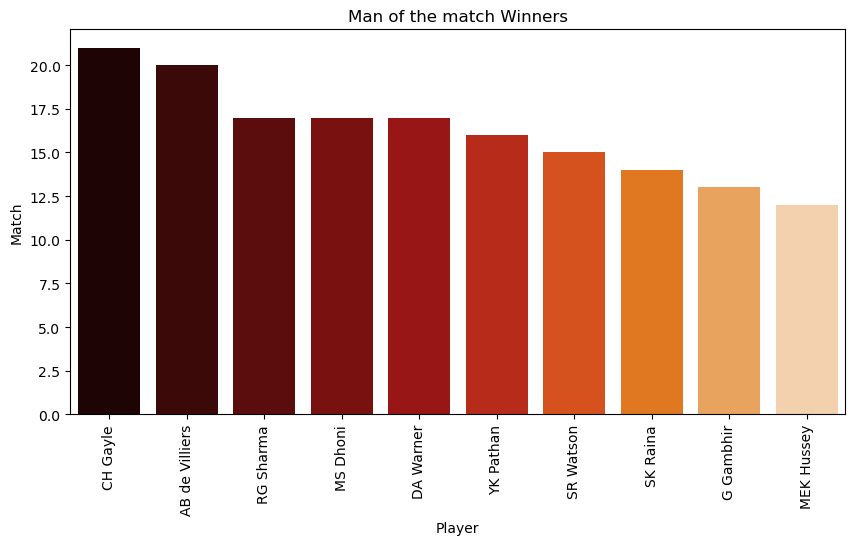

In [26]:
#man of the match winners
matches_df['player_of_match'].value_counts()[0:5]
plt.figure(figsize=(10,5))
sns.barplot(x=matches_df.player_of_match.value_counts()[:10].index,y=matches_df.player_of_match.value_counts()[:10],palette = 'gist_heat')
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation=90);

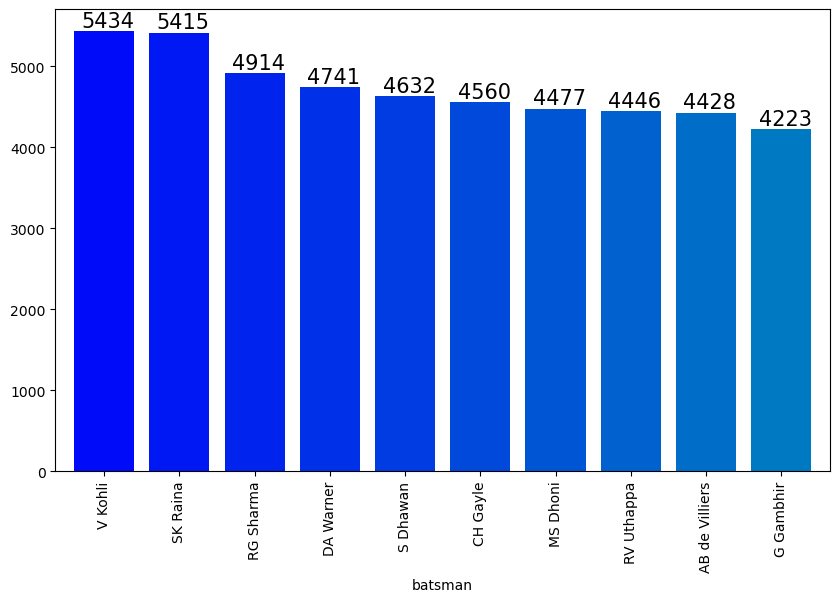

In [27]:
#highest run scorer
plt.subplots(figsize=(10,6))
max_runs=delv_df.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()


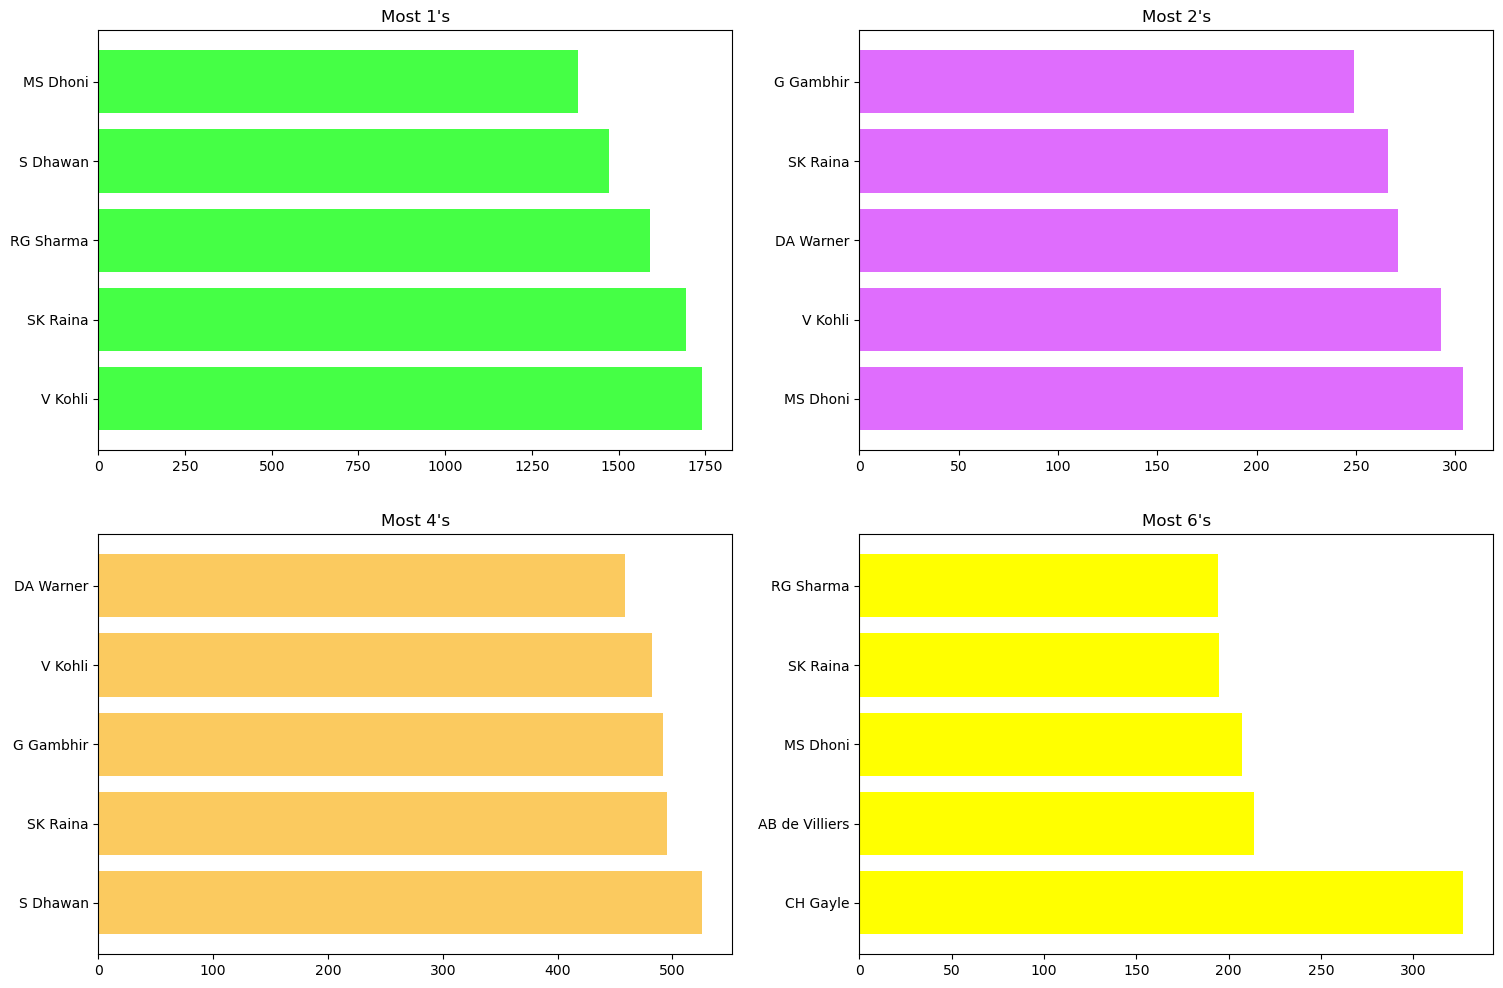

In [28]:
toppers=delv_df.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()

In [29]:
#high scores of individuals
top_scores = delv_df.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()

top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_runs= top_scores.nlargest(10,'batsman_runs')

In [30]:
top_runs

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


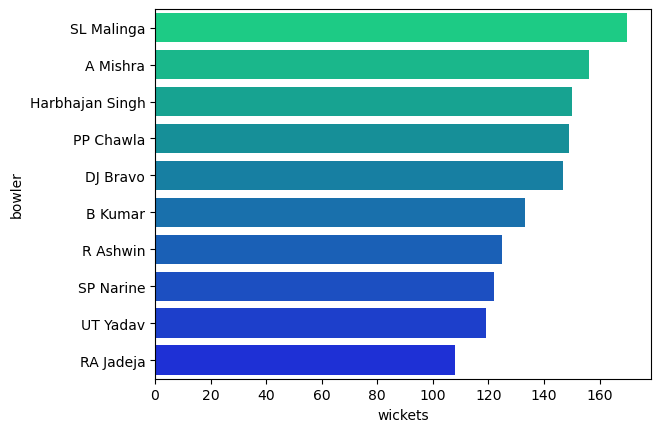

In [33]:
#most wickets by individuals

df['player_dismissed'] = df['player_dismissed'].fillna(0)
df['wickets'] = df[df.dismissal_kind != 'run out']['player_dismissed'].apply(lambda x: 1 if x != 0 else x)
most_wickets = df.groupby('bowler')['wickets'].sum().sort_values(ascending = False).head(10)
sns.barplot(y = most_wickets.index, x =most_wickets, palette = 'winter_r');

***CONCLUSION:-***

1. The most successful team: Mumbai Indians as it has the most number of wins.

2. Best batsmans: Virat Kohli(Most number of Runs), Chris Gayle(Most man of the matches)

3. Best Bowlers: SL Malinga(Most number of wickets), B Kumar(Most purple caps)

4. Seasons statistics:
-  Most matches were played in 2013 season.
-  Most runs were scored in 2013 season.
-  Best average of runs per match were in 2018 season.
-  Most number of matches were held at Eden Garden.

5. Factors affecting match:
-  Toss
    -  Most teams chose to field first.
    -  There is a negligible difference between winning the match on basis of result of toss.
    -  Mumbai Indian have won most number of tosses giving them an upper hand.
    -  Many matches were won by chasing the total after winnin the toss.
-   Ground: Home ground were not that effective as a factor contributing to win or loss of a team.
-   Batting first: Mumbai Indian has come out to be a better team to save their target than other teams.
-   Batting second: Chennai Super Kings have came out to be a better chaser than other teams

5. Team a company should endorse based on this simple EDA: Mumbai Indians 

6. Players a company should endorse based on this simple EDA: Chris Gayle, Virat Kohli, SL Malinga, B Kumar 